In [6]:
#test
from fastai.vision.all import *
from pathlib import PosixPath
import numpy as np
import requests
from io import BytesIO
from fastai.vision.widgets import *
#import ipywidgets as widgets
#import matplotlib.pyplot as plt

In [7]:
path = PosixPath(".")

In [8]:
learn_inf = load_learner(path/'export.pkl')

In [9]:
text = widgets.Text(
    value='Enter an Image URL',
    placeholder='Type something',
    description='String:',
    disabled=False
)


In [10]:
button1 = widgets.Button(
    description='Click me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)

In [11]:
out = widgets.Output()
out.clear_output()
#@out.capture(clear_output=True)
def function_with_captured_output(change):
    
    response = requests.get(text.value)
    im = PILImage.create(BytesIO(response.content))
    prediction = learn_inf.predict(im)
    tmask = Transform(PILMask.create)
    mask = tmask(prediction[0])
   
    
    all_images,axs = plt.subplots(1,3, figsize=(10,10))
    im.show(ctx=axs[1], title='image')
    mask.show(alpha=1, ctx=axs[2], vmin=1, vmax=30, title='mask')
    im.show(ctx=axs[0], title='superimposed')
    mask.show(alpha = 0.5, ctx=axs[0], vmin=1, vmax=30)
    
    with out: 
        out.clear_output()
        display(all_images)
    
button1.on_click(function_with_captured_output)

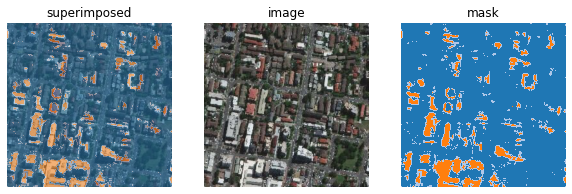

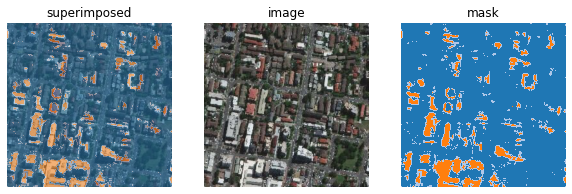

In [12]:
widgets.VBox([widgets.Label('Select your image'), 
      text, button1, out])